In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump,load
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('Alert')

In [4]:
#Data collection and analysis
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
df.tail(30)

,age,sex,bmi,children,smoker,region,charges
1308,25,female,30.200,0,yes,southwest,33900.65300
1309,41,male,32.200,2,no,southwest,6875.96100
1310,42,male,26.315,1,no,northwest,6940.90985
1311,33,female,26.695,0,no,northwest,4571.41305
1312,34,male,42.900,1,no,southwest,4536.25900
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [32]:
#Replace all the text to numbers in the data
df.replace({'sex':{'male':1, 'female':0}},inplace=True)
df.replace({'smoker':{'yes':1, 'no':0}},inplace=True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}},inplace=True)


In [33]:
#No null value found
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df.value_counts()

age  sex  bmi     children  smoker  region  charges    
19   1    30.590  0         0       2       1639.56310     2
47   1    29.830  3         0       2       9620.33070     1
48   0    25.850  3         1       0       24180.93350    1
          22.800  0         0       1       8269.04400     1
47   1    47.520  1         0       0       8083.91980     1
                                                          ..
31   0    25.740  0         0       0       3756.62160     1
          23.600  2         0       1       4931.64700     1
          21.755  0         0       2       4134.08245     1
30   1    44.220  2         0       0       4266.16580     1
64   1    40.480  0         0       0       13831.11520    1
Name: count, Length: 1337, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<Figure size 600x600 with 0 Axes>

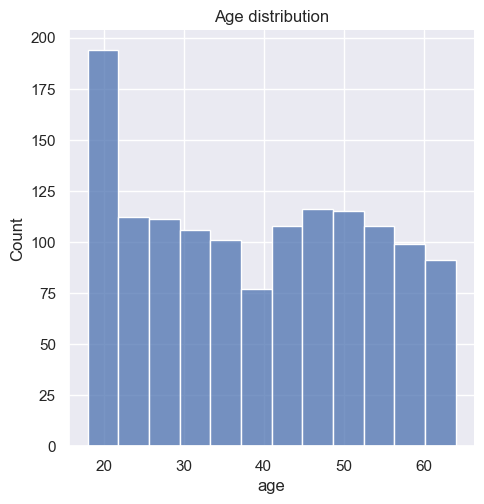

In [13]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age distribution')
plt.show()

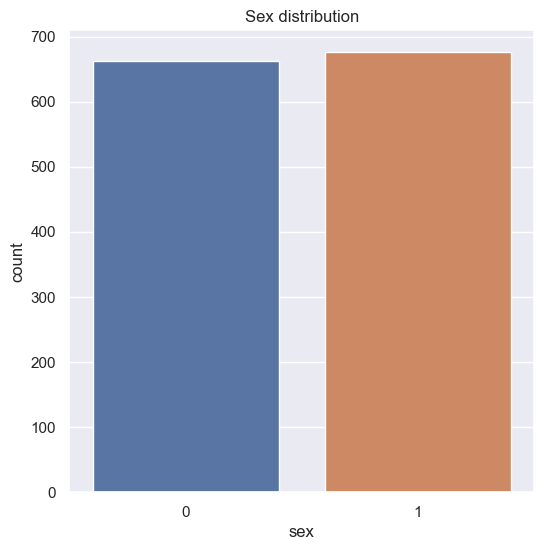

In [36]:
#Gender graph, Male=1, Female=0
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

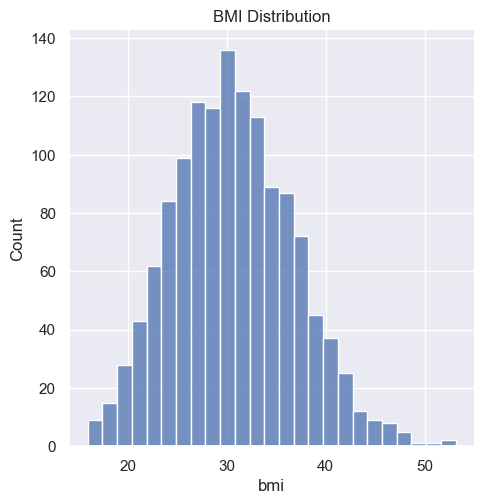

In [14]:
#BMI distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

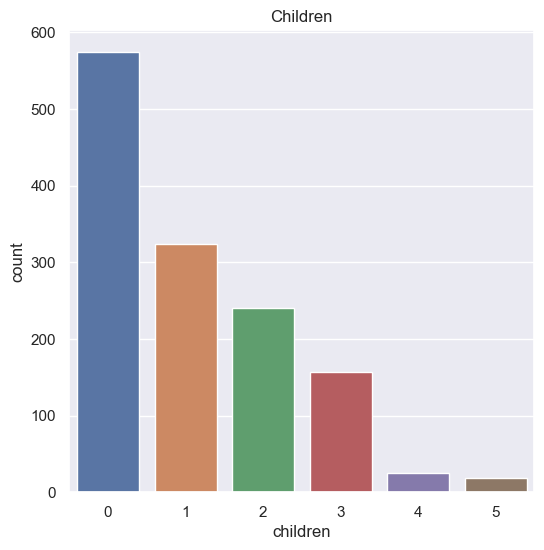

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

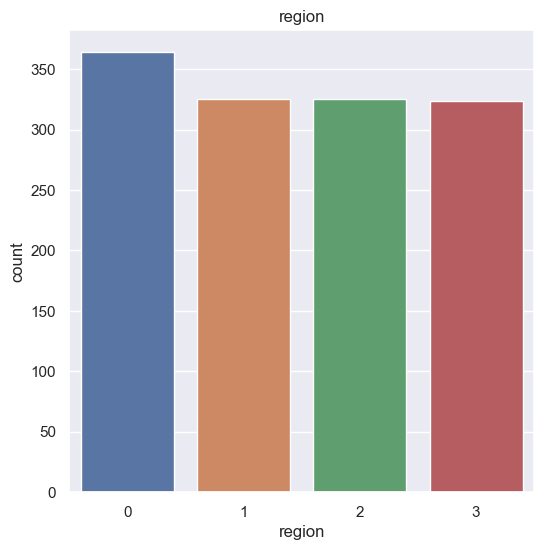

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [44]:
#Split the data
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [47]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [49]:
#creating a model
model=LinearRegression()

In [50]:
#Fit/train model on training data
model.fit(X_train,Y_train)

LinearRegression()

In [114]:
#preview predicted data
model.predict(X_test)

array([ 1849.99753167, 11867.733825  , 10310.04943817,  2260.80777569,
        8129.02661522, 11210.24097812,  3429.34711481,  1182.77821235,
       11878.92322286,  9610.67309293, 11381.23514938,  5130.60728022,
       29286.59804636,  -485.9059203 , 12876.51860723, 13005.23058309,
        4119.59285021,  7952.27596594, 28760.88302256,  2926.71329248,
       12288.57326019,  2389.7971545 , 34066.19175666, 31611.39346729,
       29905.76382717,  8711.8085728 ,  2333.62272477, 15357.11228267,
        6765.14476006,  1983.67406158,  9556.22855913,  5835.41564786,
        4476.2743494 ,  4843.42711102,  9487.72381178,  4822.2854341 ,
       29619.5563375 ,  6736.77417373, 27094.20761588, 13734.65911055,
         240.54971063, 27952.67827691,  7697.55983463,  1568.85883994,
       10330.80268902,  8186.07966263, 11421.60574856,  8262.98513521,
       10949.21698076, 13732.20111787,  6354.3430174 ,  -812.83273629,
       25832.72250259, 36391.06944182,  7378.18511804, 18096.54161478,
      

In [53]:
#prediction of training data
training_data_prediction = model.predict(X_train)

In [54]:
testing_data_prediction = model.predict(X_test)

In [55]:
r2_test=metrics.r2_score(Y_test, testing_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.7454471618659975


In [56]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.7518195459072954


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
MAE=mean_absolute_error(Y_test,testing_data_prediction)
print(MAE)
MSE=mean_squared_error(Y_test,testing_data_prediction)
print(MSE)
RMSE=np.sqrt(MSE)
print(RMSE)

4260.502062366075
38228939.144009285
6182.955534694494


In [59]:
#making a predictive system 
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print('The insurance cost is $',prediction[0])

The insurance cost is $ 27524.88981206465
